In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(transform_output="pandas")

random_state = 42

# Подключим датафрейм и выгрузим данные
df = pd.read_csv("data/house_data.csv")

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Удалим ненужные столбцы

In [37]:
columns_to_drop = ['id', 'date', 'grade', 'yr_renovated', 'sqft_living15', 'lat', 'long', 'sqft_lot15', 'sqft_above', 'zipcode']
df_cleaned = df[['sqft_living', 'price', 'floors', 'bathrooms', 'bedrooms', 'sqft_basement']]

df_cleaned.head(10)

sqft_living      price  floors  bathrooms  bedrooms  sqft_basement
0         1180   221900.0     1.0       1.00         3              0
1         2570   538000.0     2.0       2.25         3            400
2          770   180000.0     1.0       1.00         2              0
3         1960   604000.0     1.0       3.00         4            910
4         1680   510000.0     1.0       2.00         3              0
5         5420  1225000.0     1.0       4.50         4           1530
6         1715   257500.0     2.0       2.25         3              0
7         1060   291850.0     1.0       1.50         3              0
8         1780   229500.0     1.0       1.00         3            730
9         1890   323000.0     2.0       2.50         3              0

### Визуализация данных

Text(0, 0.5, 'sqft_basement')

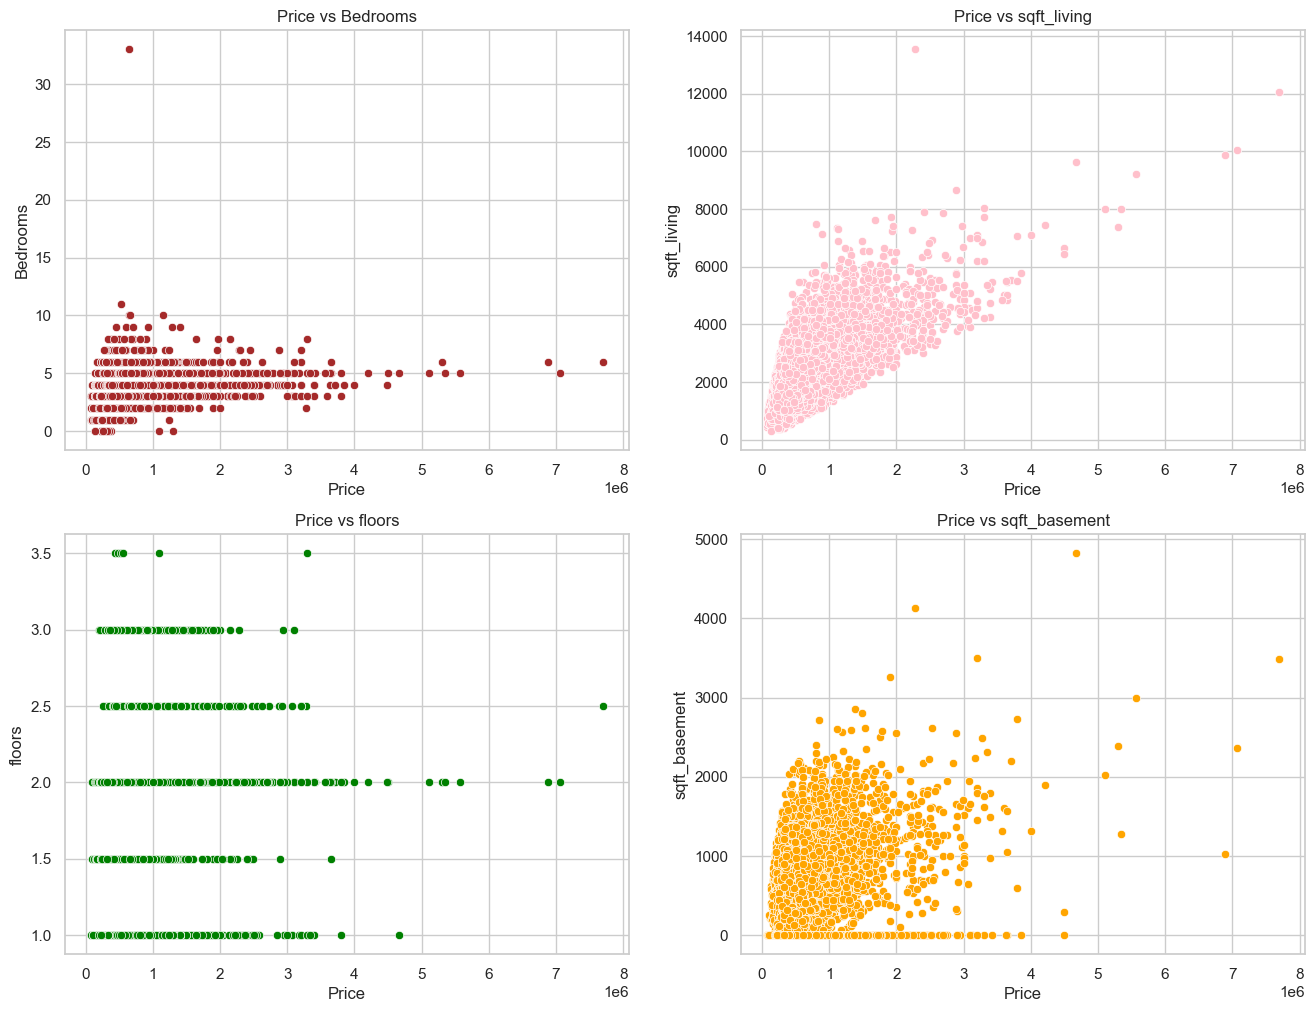

In [38]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 12))

#Отношение цены к спальным комнатам
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['bedrooms'], color="brown")
plt.title('Price vs Bedrooms')
plt.xlabel('Price')
plt.ylabel('Bedrooms')

#Отношение цены к квадратному футу жилплощади
plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['sqft_living'], color="pink")
plt.title('Price vs sqft_living')
plt.xlabel('Price')
plt.ylabel('sqft_living')

#Отношение цены к количеству этажей
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['floors'], color="green")
plt.title('Price vs floors')
plt.xlabel('Price')
plt.ylabel('floors')

#Отношение цены к размеру подвала
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['sqft_basement'], color="orange")
plt.title('Price vs sqft_basement')
plt.xlabel('Price')
plt.ylabel('sqft_basement')

### Иерархическая агломеративная кластеризация

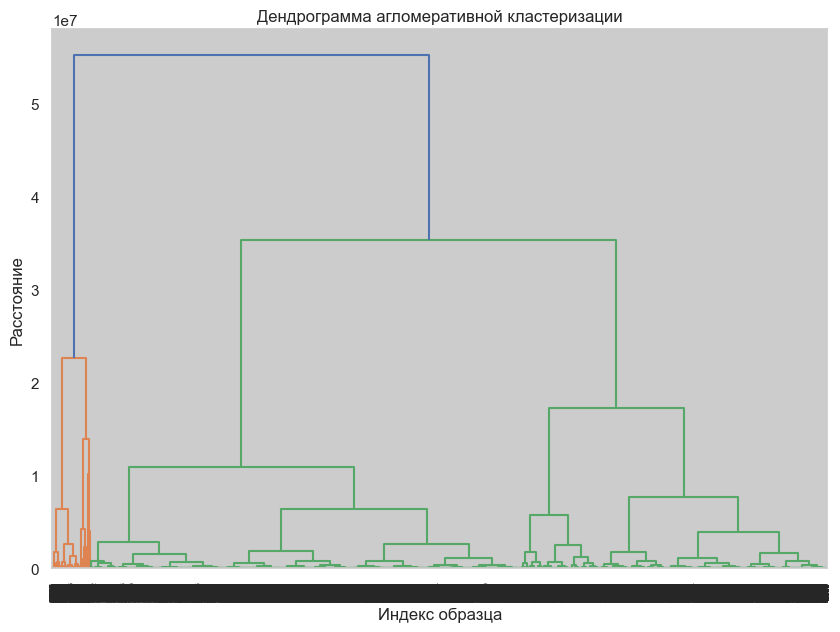

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage


linkage_matrix = linkage(df_cleaned, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Дендрограмма агломеративной кластеризации')
plt.xlabel('Индекс образца')
plt.ylabel('Расстояние')
plt.show()

### Получение результатов иерархической кластеризации

array([ 2152, 18009,  1183, ...,  4881,  5049, 11343], dtype=int32)

sqft_living     price  floors  bathrooms  bedrooms  sqft_basement
0             1180  221900.0     1.0       1.00         3              0
1             2570  538000.0     2.0       2.25         3            400
2              770  180000.0     1.0       1.00         2              0
3             1960  604000.0     1.0       3.00         4            910
4             1680  510000.0     1.0       2.00         3              0
...            ...       ...     ...        ...       ...            ...
21608         1530  360000.0     3.0       2.50         3              0
21609         2310  400000.0     2.0       2.50         4              0
21610         1020  402101.0     2.0       0.75         2              0
21611         1600  400000.0     2.0       2.50         3              0
21612         1020  325000.0     2.0       0.75         2              0

[21613 rows x 6 columns]

Text(0, 0.5, 'sqft_basement')

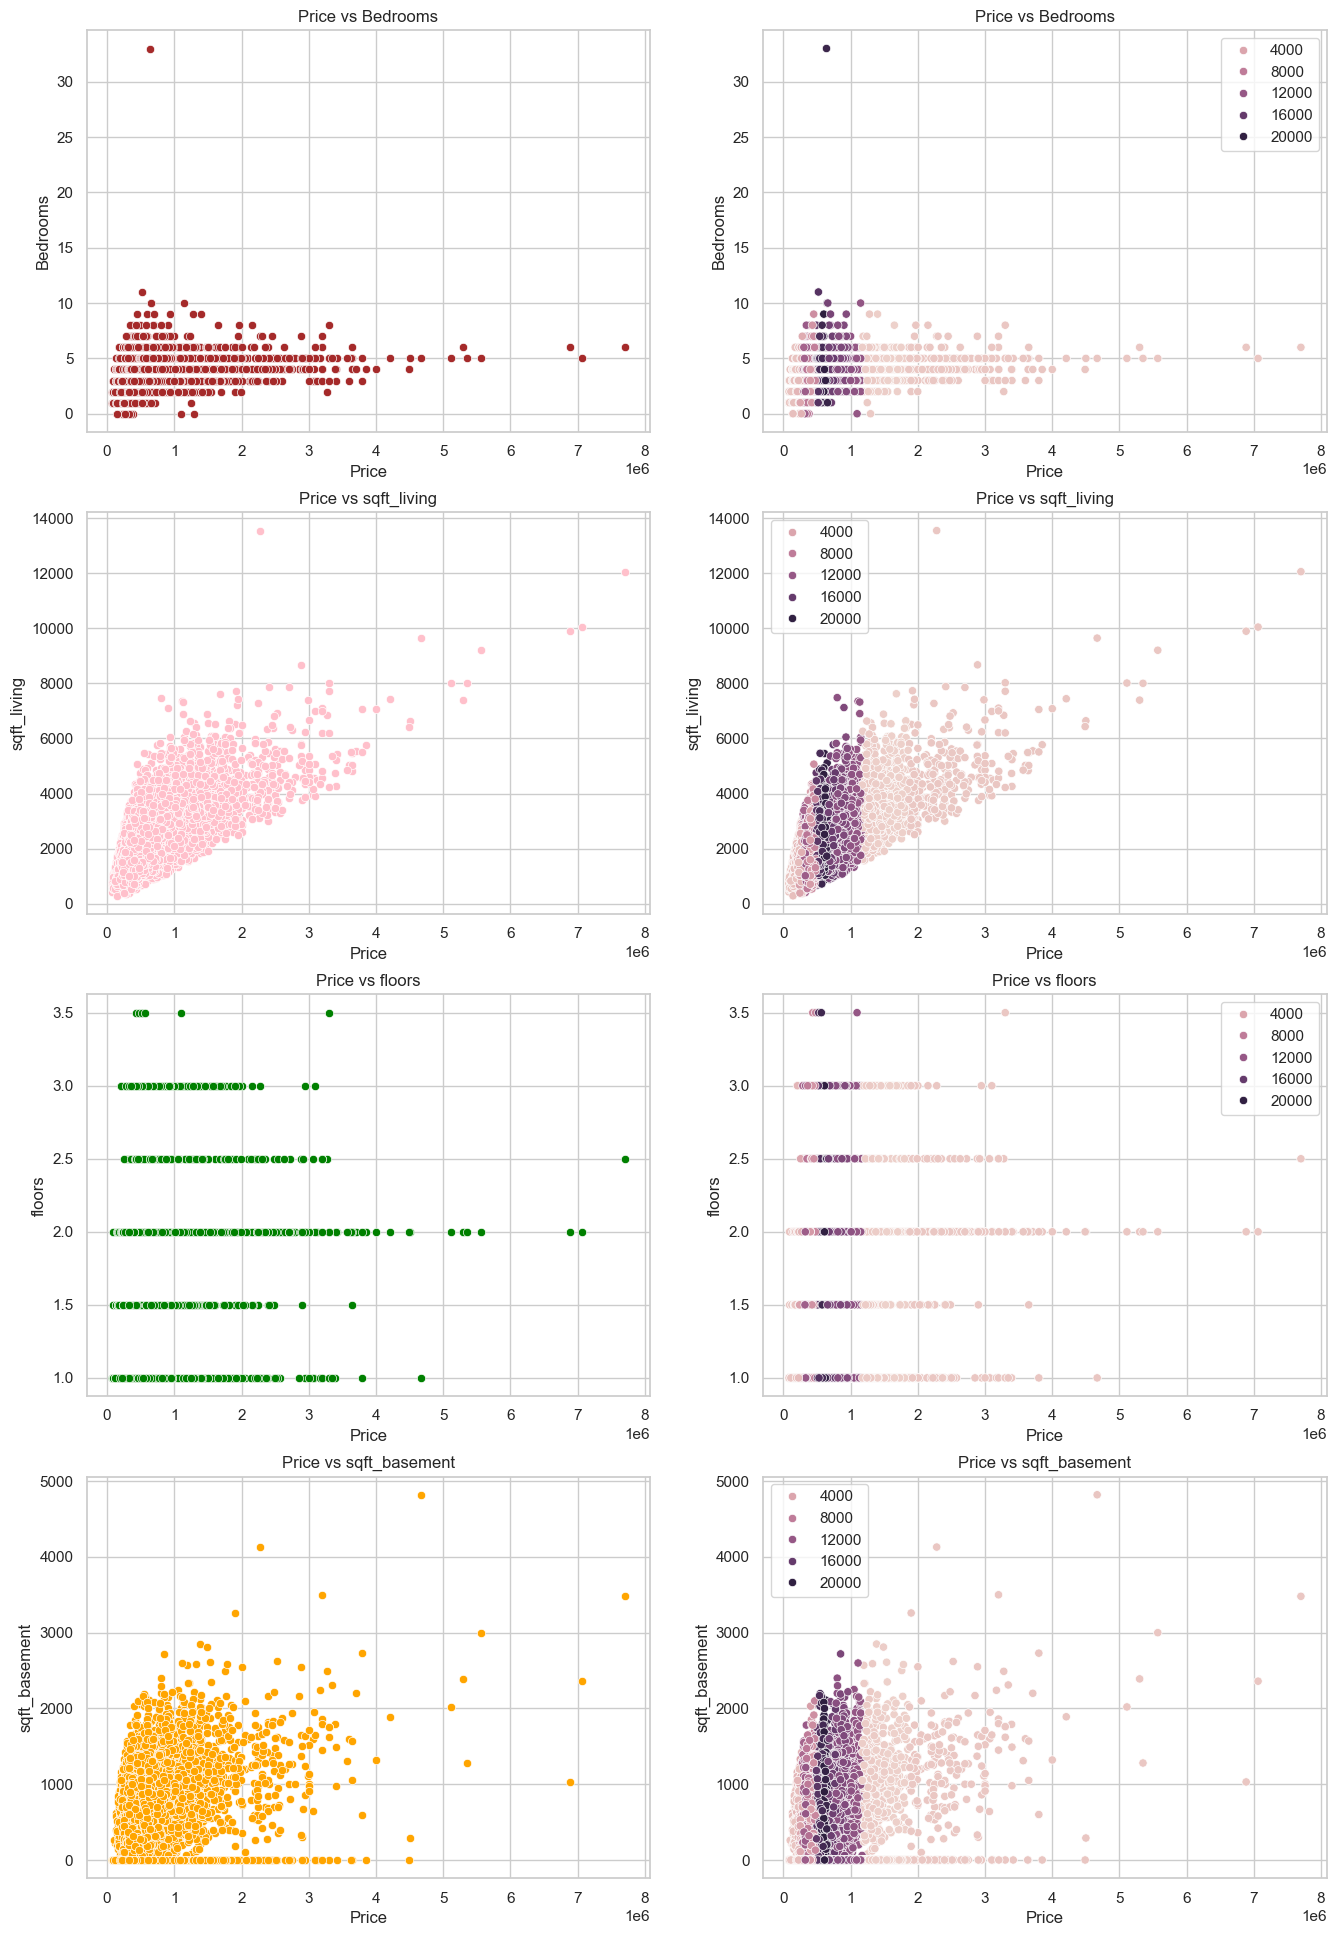

In [40]:
from scipy.cluster import hierarchy

#Получение результатов
result = hierarchy.fcluster(linkage_matrix, 10, criterion="distance")

display(result)
display(df_cleaned)
sns.set(style="whitegrid")

plt.figure(figsize=(16, 24))

#Вывод до кластеризации и после
#Отношение цены к спальным комнатам
plt.subplot(4, 2, 1)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['bedrooms'], color="brown")
plt.title('Price vs Bedrooms')
plt.xlabel('Price')
plt.ylabel('Bedrooms')

plt.subplot(4, 2, 2)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['bedrooms'], color="brown", hue=result)
plt.title('Price vs Bedrooms')
plt.xlabel('Price')
plt.ylabel('Bedrooms')

#Отношение цены к квадратному футу жилплощади
plt.subplot(4, 2, 3)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['sqft_living'], color="pink")
plt.title('Price vs sqft_living')
plt.xlabel('Price')
plt.ylabel('sqft_living')

plt.subplot(4, 2, 4)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['sqft_living'], color="pink", hue=result)
plt.title('Price vs sqft_living')
plt.xlabel('Price')
plt.ylabel('sqft_living')

#Отношение цены к количеству этажей
plt.subplot(4, 2, 5)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['floors'], color="green")
plt.title('Price vs floors')
plt.xlabel('Price')
plt.ylabel('floors')

plt.subplot(4, 2, 6)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['floors'], color="green", hue=result)
plt.title('Price vs floors')
plt.xlabel('Price')
plt.ylabel('floors')

#Отношение цены к размеру подвала
plt.subplot(4, 2, 7)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['sqft_basement'], color="orange")
plt.title('Price vs sqft_basement')
plt.xlabel('Price')
plt.ylabel('sqft_basement')

plt.subplot(4, 2, 8)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['sqft_basement'], color="orange", hue=result)
plt.title('Price vs sqft_basement')
plt.xlabel('Price')
plt.ylabel('sqft_basement')

### Неиерархическая четкая кластеризация (k-means)
Выделим признаки, нужные для кластеризации

array([[2.45509345e+03, 6.89163184e+05, 1.62145610e+00, 2.36151252e+00,
        3.61175337e+00, 3.62289981e+02],
       [5.09415263e+03, 2.80610884e+06, 1.88157895e+00, 3.87368421e+00,
        4.35263158e+00, 1.03540000e+03],
       [3.63203336e+03, 1.35883310e+06, 1.80105777e+00, 3.07282343e+00,
        4.03173312e+00, 6.45260374e+02],
       [1.67717404e+03, 3.45165436e+05, 1.38799505e+00, 1.85914295e+00,
        3.15818379e+00, 2.07165455e+02]])

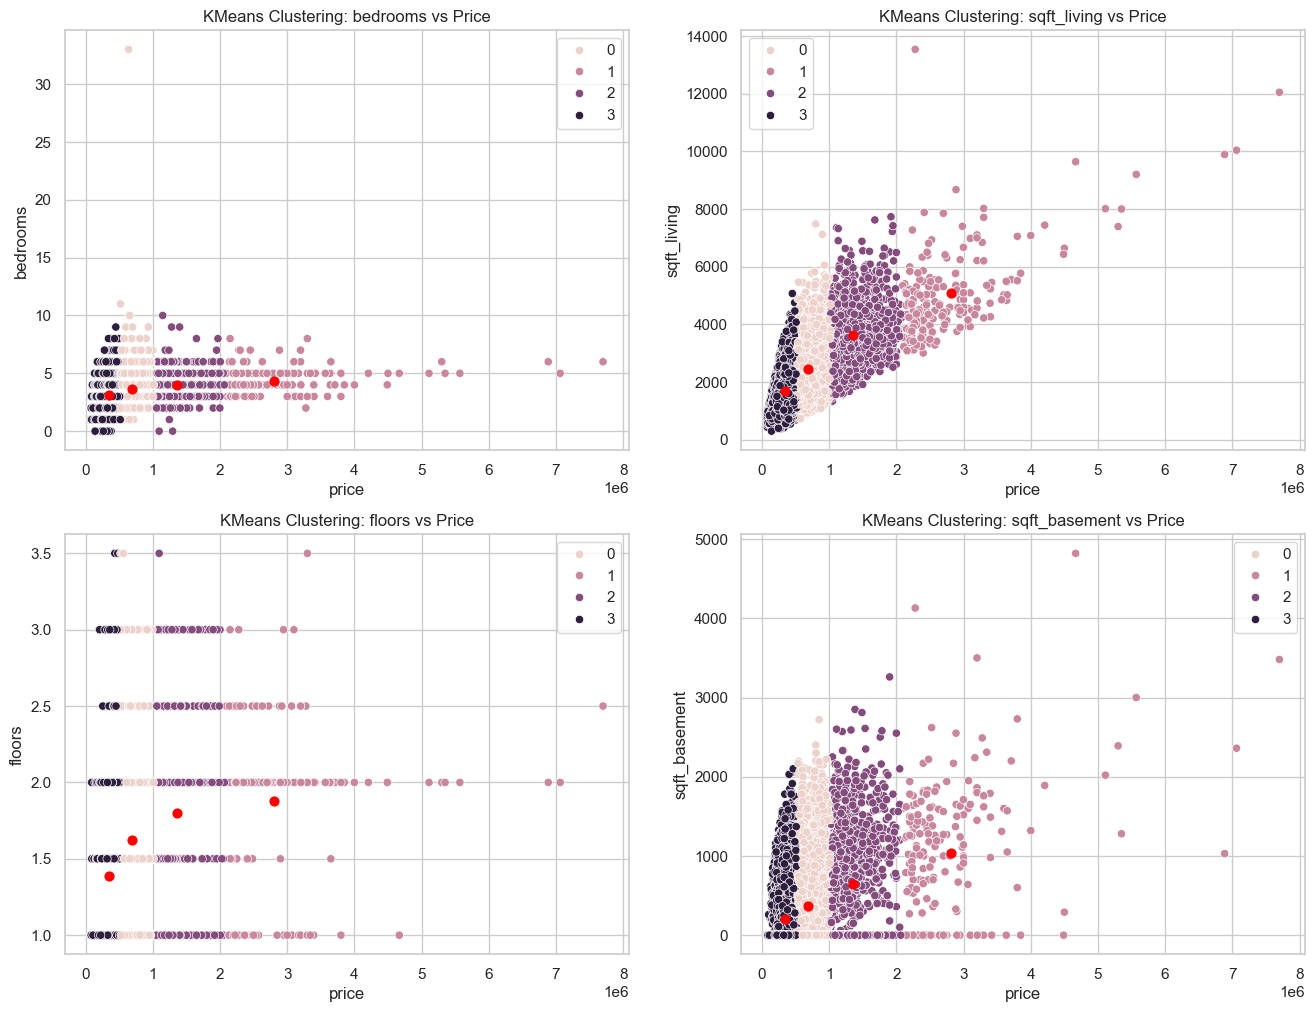

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_used = ['sqft_living', 'price', 'floors', 'bathrooms', 'bedrooms', 'sqft_basement']
data_to_scale = df_cleaned

random_state = 42
kmeans = KMeans(n_clusters=4, random_state=random_state)
labels = kmeans.fit_predict(data_to_scale)
centers = kmeans.cluster_centers_

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['bedrooms'], hue=labels,)
plt.scatter(centers[:, 1], centers[:, 4], s=40, color='red')
plt.title('KMeans Clustering: bedrooms vs Price')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['sqft_living'], hue=labels,)
plt.scatter(centers[:, 1], centers[:, 0], s=40, color='red')
plt.title('KMeans Clustering: sqft_living vs Price')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['floors'], hue=labels,)
plt.scatter(centers[:, 1], centers[:, 2], s=40, color='red')
plt.title('KMeans Clustering: floors vs Price')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['price'], y=df_cleaned['sqft_basement'], hue=labels,)
plt.scatter(centers[:, 1], centers[:, 5], s=40, color='red')
plt.title('KMeans Clustering: sqft_basement vs Price')

display(centers)

### Понижение размерности

Text(0.5, 1.0, 'PCA reduced data: KMeans Clustering')

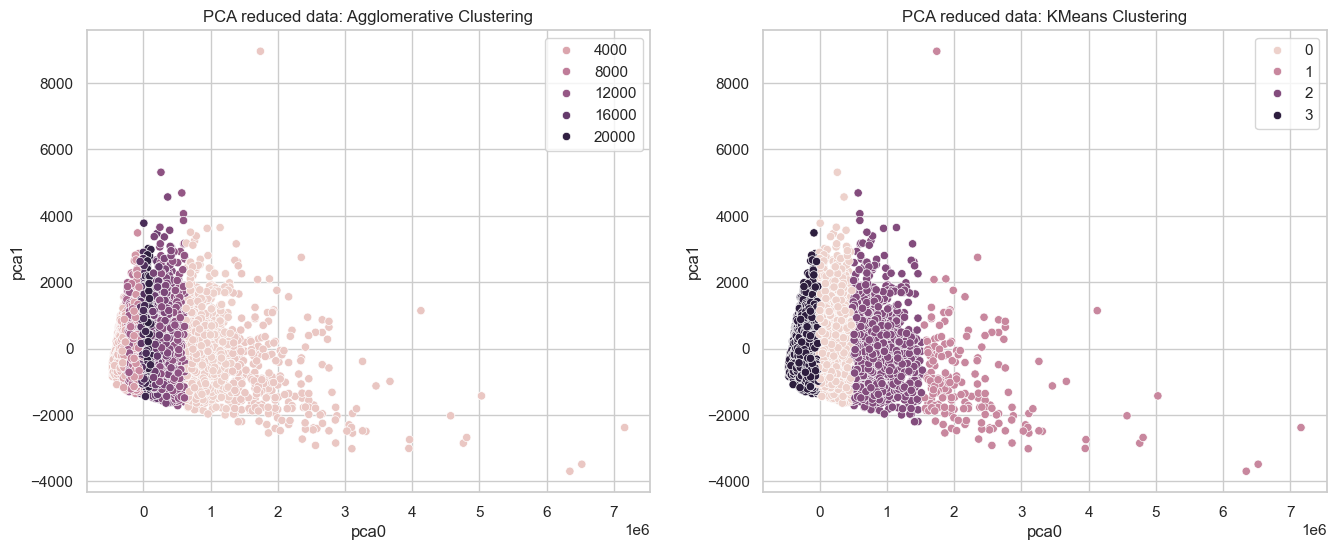

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_to_scale)

# Визуализация сокращенных данных
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_data.iloc[:, 0], y=reduced_data.iloc[:, 1], hue=result)
plt.title('PCA reduced data: Agglomerative Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data.iloc[:, 0], y=reduced_data.iloc[:, 1], hue=labels)
plt.title('PCA reduced data: KMeans Clustering')

### Выбор количества кластеров на основе инерции

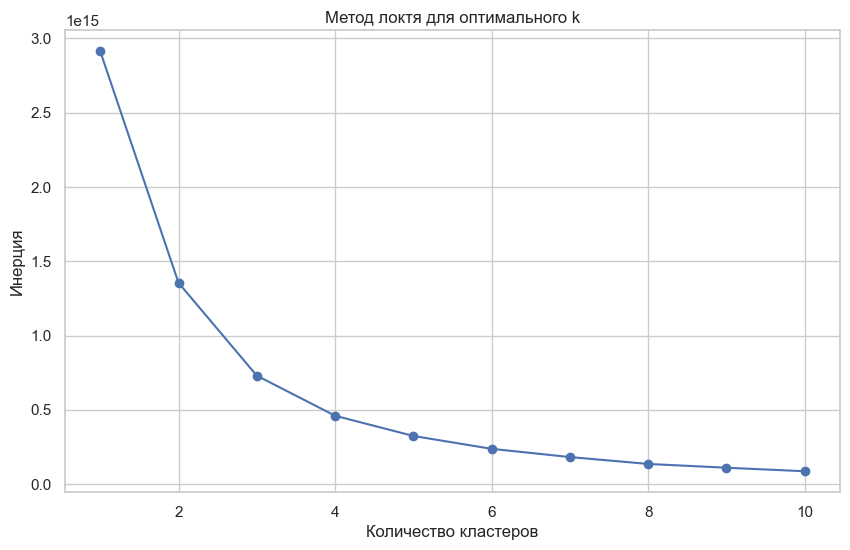

In [ ]:
import math
from sklearn import cluster

max_clusters = int(math.sqrt(len(df)))
clusters_range = range(1, 11)
kmeans_per_k = [
        cluster.KMeans(n_clusters=k, random_state=random_state).fit(data_to_scale)
        for k in clusters_range
    ]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

### Расчет коэффициентов силуэта
Средний коэффициент силуэта (silhouette score) используется для оценки качества кластеризации. Его значение лежит в диапазоне от -1 до 1. Что означают различные значения:

0.7–1.0 : Кластеры хорошо разделены и компактны. Это отличный результат кластеризации.

0.5-0.7 : Кластеры четко различимы, но есть некоторое пересечение между ними. Это хороший результат. 

0.25-0.5 : Кластеры перекрываются, что указывает на менее четкую границу между группами. Качество кластеризации удовлетворительное, но может потребоваться уточнение числа кластеров или доработка данных. 

Близко к 0.0: Кластеры сильно перекрываются или распределение данных не позволяет выделить четкие группы. В этом случае нужно пересмотреть выбор числа кластеров, алгоритм или исходные данные. 

Меньше 0.0: Плохая кластеризация: точки ближе к центрам чужих кластеров, чем к своим. Это сигнал о том, что данные плохо структурированы для текущей кластеризации.

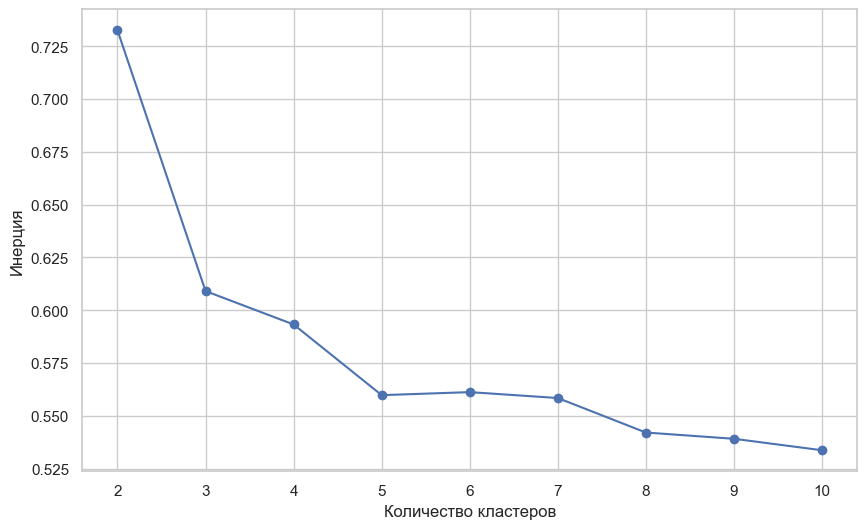

In [82]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in clusters_range[1:]:  
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    labels = kmeans.fit_predict(data_to_scale)
    score = silhouette_score(data_to_scale, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(clusters_range[1:], silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

Средний коэффициент силуэта: 0.593


Text(0, 0.5, 'Вторая компонентa PCA')

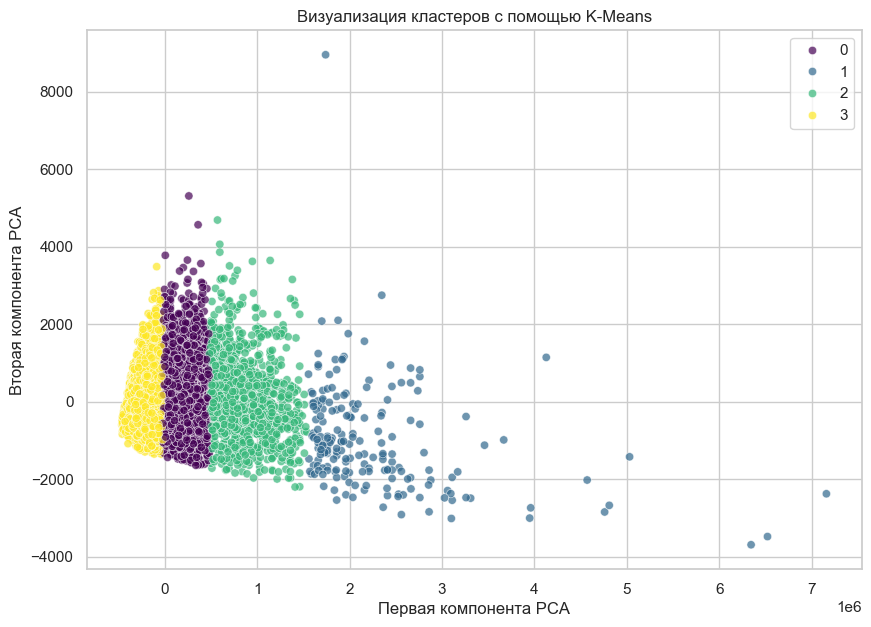

In [84]:
# Применение K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  
df_clusters = kmeans.fit_predict(data_to_scale)

# Оценка качества кластеризации
silhouette_avg = silhouette_score(data_to_scale, df_clusters)
print(f'Средний коэффициент силуэта: {silhouette_avg:.3f}')

# Визуализация кластеров
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data_to_scale)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=df_clusters, palette='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью K-Means')
plt.xlabel('Первая компонентa PCA')
plt.ylabel('Вторая компонентa PCA')

В нашем случае средний коэффициент силуэта: 0.593 указывает на то, что кластеры хорошо разлечимы, но есть небольшие пересечения. Данный результат соответствует хорошему состоянию.